# MA3001B



In [1]:
#import pytsdatasets as tsds
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## 5.5.3 Autocovariance and autocorrelation function (ACF)


### Autocovariance function

We define a random variable as a function (or a map):

$X:S\rightarrow\mathbb{R}$

from $S$ (the experiment sample space) to a real number. If we repeat the experiment many times we obtain different values of $X$, for example: $x=(5,15,19,..)$. We say that $5$, fo example, is a "realization" of $X$ (the result obtained $\bf{after}$ the experiment).
If we have two random variables $(X,Y)$ we define the covariance as:

$Cov(X,Y)=E[(X-\mu_X)(Y-\mu_Y)]$

and it measures the linear dependence between the two random variables.
Let's consider now a sequence of random variables, considered at different times:

$X_{t=1},X_{t=2},X_{t=3},..$

The sequence is called a "stochastic process". At each time, each random variable can have its own distribution with its expectation and variance:

$X_t\sim distribution(\mu_t,\sigma_t^2)$

We define a time series as the realization of a stochastic process. So we consider the correspondance between the stochastic process $X=(X_{t_1},X_{t_2},...,X_{T})$ and its realization (the time series) $x=(x_{t=1},x_{t=2},...,x_{T})$. At each time, the value of the time series $x_{t}$ is a realization of the random variable $X_t$. The advantage of identifying the series as a realization of a stochastic process is that we can use statistical properties of the random variables, as mean, variance, covariance, to describe the time series.
We define the $\bf{autocovariance\,\,function}$ as the covariance of random variables $(X_s,X_t)$ at times $(s,t)$:

$\gamma(X_s,X_t)=cov(X_s,X_t)=E[(X_s-\mu_s)(X_t-\mu_t)]$

At time s=t:

$\gamma(X_t,X_t)=cov(X_t,X_t)=E[(X_t-\mu_t)^2]=Var(X_t)=\sigma_{X_t}^2$

Assuming that we are working with stationary time series, the autocovariance function only depends on the time difference between $s$ and $t$:

$\gamma_k=\gamma(t,t+k)$

We refer to the time difference $k$ as to a "lag".

### Autocovariance coefficients

The estimation of autocovariance of random variables $\gamma_k$ calculated from the time series is given by:

$c_k=\frac{\sum_{t=1}^{N-k} (x_t-\bar{x})(x_{t+k}-\bar{x})}{N}$

$\bar{x}=\frac{\sum_{t=1}^N x_t}{N}$

### Autocorrelation function (ACF)

Assuming stationarity, we define the autocorrelation coefficient between the random variables $X_t$ and $X_{t+k}$ as:

$-1\le \rho_k=\frac{\gamma_k}{\gamma_{k=0}}\le 1$

The estimation of autocorrelation coefficient, calculated from the time series values at times $t$ and $t+k$ (at lag k) is:

$r_k=\frac{c_k}{c_{k=0}}$

The autocorrelation coefficient estimation can also be written as:

$r_k=\frac{\sum_{t=1}^{N-k} (x_t-\bar{x})(x_{t+k}-\bar{x})}{\sum_{t=1}^N (x_t-\bar{x})^2}$

One can draw a correlogram, with the autocorrelation coefficients at different lags.

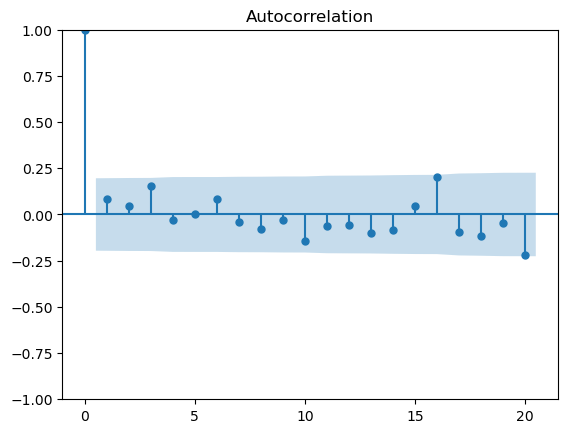

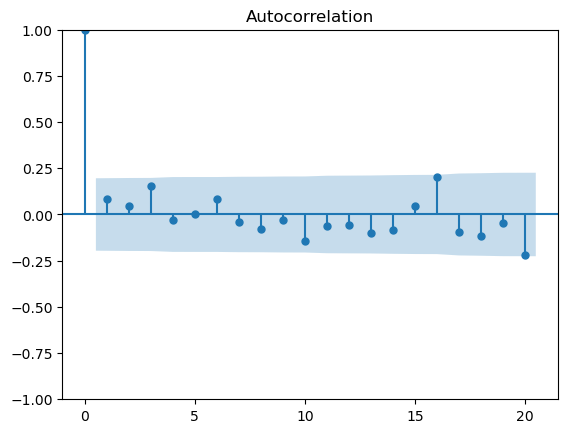

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

serie = np.random.normal(0,1,100)
ts = pd.DataFrame()
ts['serie']=serie

plot_acf(ts, ax=plt.gca())

The first coefficient is always 1:

$r_0=\frac{c_0}{c_0}=1$

The blue colored area represents the significance level, if the autocorrelation coefficient is within the blue ares it is not siginificative. In this example the time series is a pure random process, generated with a random normal distribution, and we do not expect significative autocorrelation coefficients. The values of the autocorrelation coefficients are:

In [3]:
from statsmodels.tsa.stattools import acf
print(acf(ts['serie']))



[ 1.          0.08587922  0.04359948  0.15641261 -0.02980796  0.00360131
  0.08570224 -0.04153598 -0.0810184  -0.03214087 -0.14550097 -0.06038718
 -0.05754804 -0.09984803 -0.08241839  0.04700049  0.20293247 -0.0972987
 -0.11580585 -0.04394074 -0.21980186]


### Example: Random walk

The simplest stochastic process is the "random walk", described by the model:

$X_t=X_{t-1}+Z_t$

The random variable $X_t$ at time $t$ is equal to the random variable at previous time $t-1$ plus a residual $Z_t$ which is pure white noise:

$Z_t\sim Normal(\mu,\sigma^2)$

i.e. a random variable with normal distribution with parameters $(\mu,\sigma^2)$.
If we consider:

* $X_0=0$
* $X_1=X_0+Z_1=Z_1$
* $X_2=X_1+Z_2=Z_1+Z_2$
* $X_3=X_2+Z_3=Z_1+Z_2+Z_3$
* ...
* $X_t=\sum_{i=1}^t Z_i$

For the linearity of expectation, we have:

$E[X_t]=E\big[\sum_{i=1}^t Z_i\big]=\sum_{i=1}^t E[Z_i]=\mu t$

$Var(X_t)=Var\big(\sum_{i=1}^t Z_i\big)=\sum_{i=1}^t Var(Z_i)=\sigma^2t$

We simulate a random walk with $X_1=0$ and $Z_t\sim Normal(0,1)$:

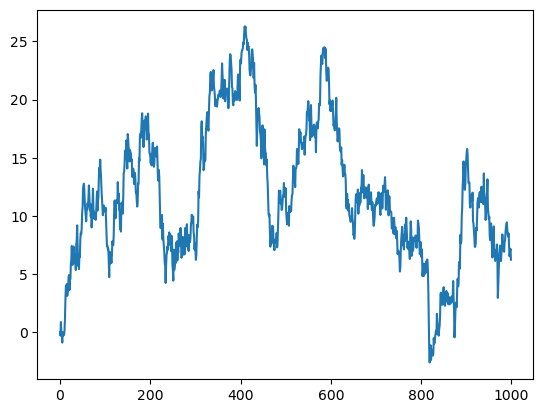

In [4]:
x = np.zeros(1000)

for i in range(1,1000):
    z = np.random.normal(0,1,1)
    x[i]=x[i-1]+z

rw = pd.DataFrame()
rw['serie']=x
plt.plot(rw)

In [5]:
print(acf(rw['serie']))

[1.         0.98466111 0.97067392 0.95782529 0.94485048 0.93180209
 0.91913748 0.90635149 0.89293688 0.87933114 0.86411028 0.8491646
 0.83533477 0.82223519 0.81025604 0.79672248 0.7827019  0.76853133
 0.75537653 0.74296895 0.73154838 0.71925328 0.70727737 0.69508347
 0.68322837 0.67184666 0.66127329 0.65053758 0.6394612  0.62907227
 0.6179586 ]


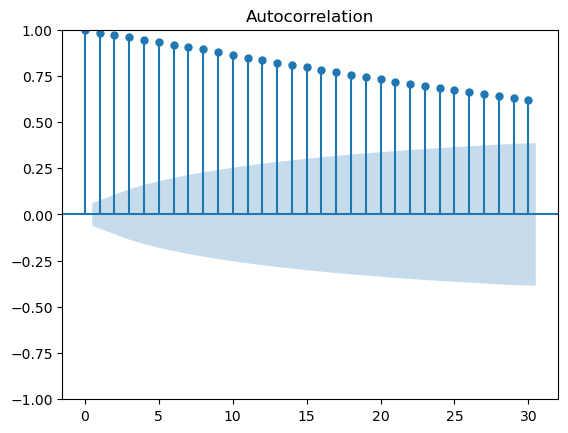

In [6]:
plot_acf(rw)
plt.show()

We can see that there is high autocorrelation and there is no stationarity. To remove the trend we can create a new time series using the so called "difference operator", which calculates the difference:

$X_t-X_{t-1}$

at any time t. Given the random walk

$\nabla X_{t}=X_t-X_{t-1}$

Applying it to the random walk process:

$X_t=X_{t-1}+Z_t$

$\nabla X_t=X_t-X_{t-1}=Z_t$

and the result is the purely random process $Z_t$, and it is stationary.

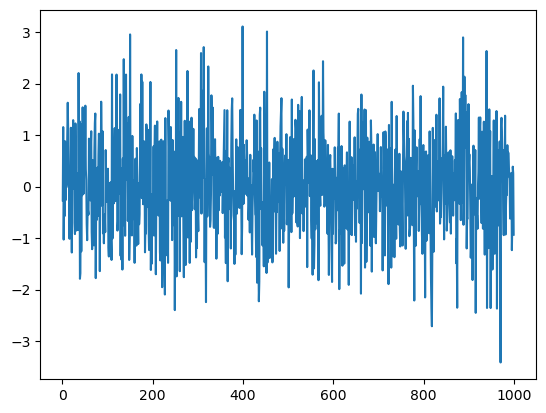

In [7]:
from statsmodels.tsa.statespace.tools import diff
rwdiff = diff(rw['serie'])
plt.plot(rwdiff)

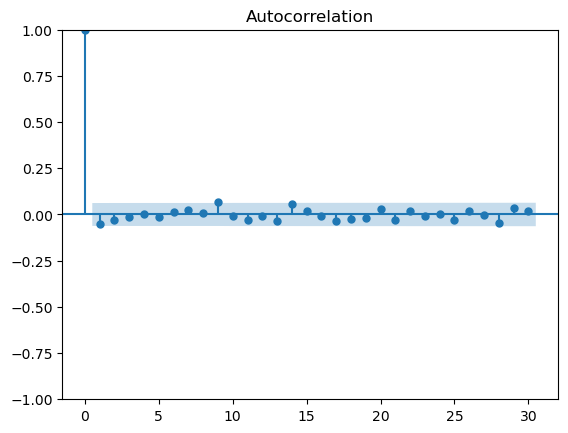

In [8]:
plot_acf(rwdiff)
plt.show()

### Example: Moving Average processes (MA(q))

In the random walk process, we have modeled the random variable at time $t$ as given by the value of the random variable at previous step and the white noise at current step. Let's consider, now, a process where there is a dependence also on the white noise at previous steps $t-1$ and $t-2$:

$X_t = Z_t+\theta_1Z_{t-1}+\theta_2Z_{t-2}$

where $\theta_1,\theta_2$ are constants. This process is called a "moving average" process of order 2, since it depends on the noise of two steps back. In general, a moving average process of order q (MA(q)) is defined as:

$X_t=Z_t+\theta_1Z_{t-1}+\theta_2Z_{t-2}+...+\theta_qZ_{t-q}$

with $Z_i$ are independent identically distributed (i.i.d.) and $Z_i\sim Normal(\mu,\sigma^2)$.



### Simulate of MA(2) process

We will simulate a MA(2) process such that:

*$X_t=Z_t+0.7Z_{t-1}+0.2Z_{t-2}$

*$Z_t\sim Normal(0,1)$

Generate 100 values

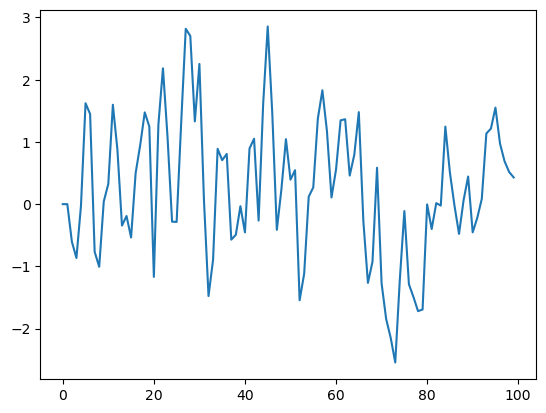

In [9]:
# Generate 100 values
n = 100
z = np.random.normal(0,1,n)
x = np.zeros(n)
for i in range(2,n):
    x[i] = z[i]+0.7*z[i-1]+0.2*z[i-2]
MA2 = pd.DataFrame()
MA2['serie']=x
plt.plot(MA2)


Draw the acf for the simulated series

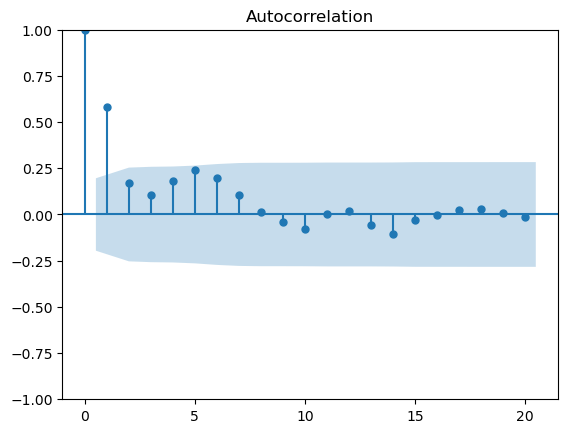

In [10]:
plot_acf(MA2)
plt.show()

What are the significative ACF? For which lags? How many ACF values are significative? Which is the order of the process?
Las primeras dos líneas son los valores significativos ya que se encuentran fuera del area azul, lo demas no son significativos. El orden del proceso es 2 ya que se trata de MA(2)



## Simulation of MA(3) process

We will simulate a MA(3) process such that:

*$X_t=Z_t+0.7Z_{t-1}+0.2Z_{t-2}+0.5Z_{t-3}$

*$Z_t\sim Normal(0,1)$

Generate 100 values

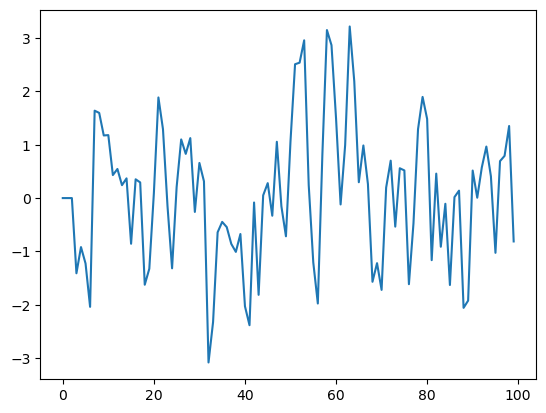

In [11]:
# MA(3)
# Generate 100 values
n = 100
z = np.random.normal(0,1,n)
x = np.zeros(n)

for i in range(3,n):
    x[i] = z[i]+0.7*z[i-1]+0.2*z[i-2]+0.1*z[i-3]
MA3 = pd.DataFrame()
MA3['serie']=x
plt.plot(MA3)

Draw the ACF:

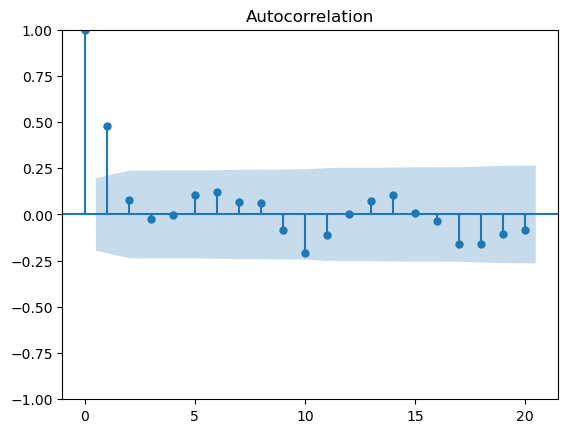

In [12]:
plot_acf(MA3)
plt.show()

What are the significative ACF? For which lags? How many ACF values are significative? Which is the order of the process?
Los valores significativos son los primeros dos, ya que se encuentran fuera del intervalo de confianza. El orden del proceso es 3 ya que se trata de (MA(3)).


## Autoregressive process AR(p)

Considering the white noise $Z_t\sim Normal(0,\sigma^2)$, we define an autoregressive process of order $p$ as:

$X_t=Z_t+\phi_1X_{t-1}+\phi_2X_{t-2}+...+\phi_pX_{t-p}$

The term at time $t$ contains the "history" of $p$ previous steps.
The random walk is an autoregressive process of order 1 (AR(1)), with the coefficient $\phi_1=1$.
An autoregressive process is not necessarily stationary.

### Simulation of an AR(1) process

Simulate an AR(1) process, with $\phi_1=1$:

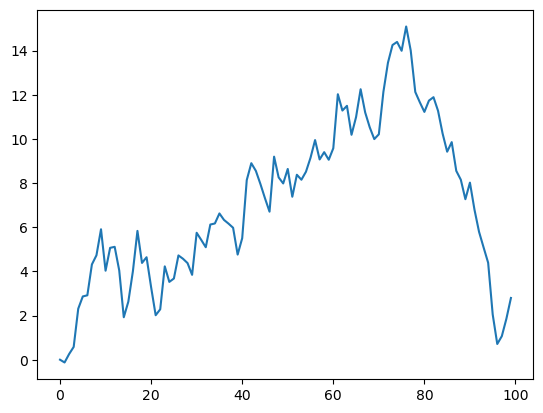

In [13]:
fi_1 = 1
mu = 0
sigma = 1
n = 100
Z = np.random.normal(mu, sigma, n)

X = np.zeros(n)

for i in range(1,n):
    X[i] = fi_1*X[i-1] + Z[i]

AR1 = pd.DataFrame()
AR1['serie']=X
plt.plot(AR1)

Draw the ACF:

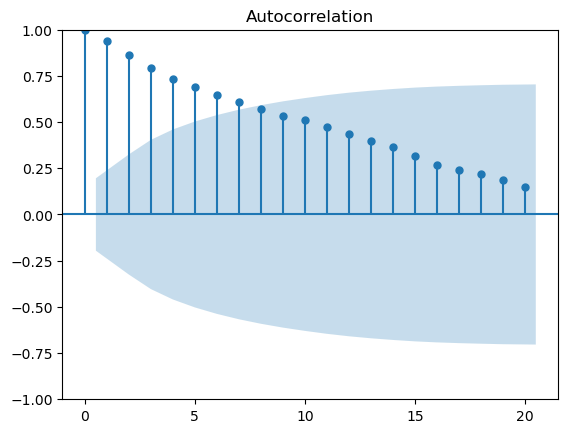

In [14]:
plot_acf(AR1)
plt.show()

What are the significative ACF? For which lags? How many ACF values are significative? Which is the order of the process?
Los valores significativos son los primeros 6, y a partir de ahí los siguientes valores comienzan a caer dentro de area azul (intervalo de confianza) por lo que estos ya no lo son. El orden del proceso es 1 ya que se trata de (AR(1))

## Simulation of AR(2) process

Let's simulate the process:

$X_t=Z_t+0.7X_{t-1}+0.2X_{t-2}$

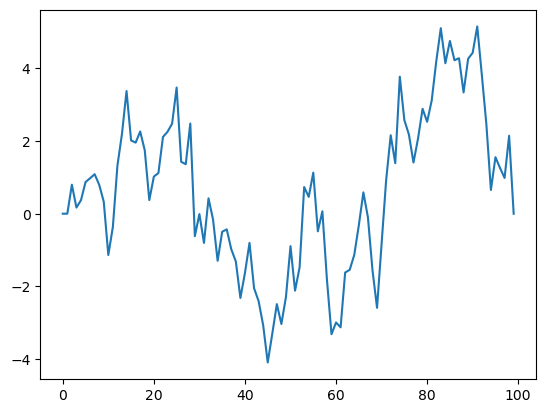

In [15]:
# AR(2) simulation

fi_1 = 0.7
fi_2 = 0.2

mu = 0
sigma = 1

n = 100
Z = np.random.normal(mu, sigma, n)

X = np.zeros(n)

for i in range(2,n):
    X[i] = fi_1*X[i-1] + fi_2*X[i-2] + Z[i]

AR2 = pd.DataFrame()
AR2['serie']=X
plt.plot(AR2)


Draw the ACF:

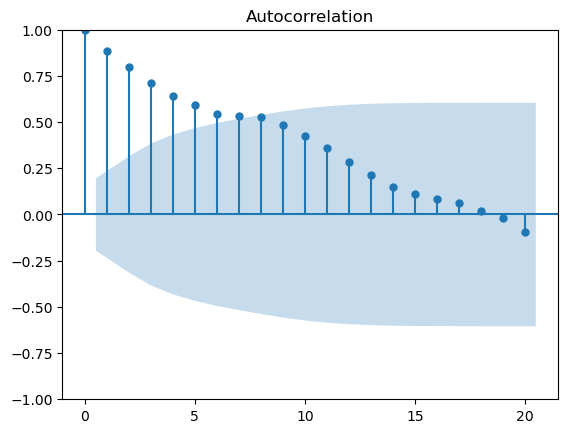

In [16]:
plot_acf(AR2)
plt.show()

What are the significative ACF? For which lags? How many ACF values are significative? Which is the order of the process?
Los primeros 5 valores son significativos, ya que podemos ver que el sexto se encuentra dentro del intervalo de confianza, por lo que a partir del 6to ya no lo son. El orden del proceso es 2 ya que se trata de (AR(2)). Después de los primeros valores ACF con valores significativos los valores tienen una tendencia disminuyente, lo que nos dirige a una correlación significativa.
